# Heart Failure Prediction

In [114]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

heart_df = pd.read_csv(r"C:\Users\User\Desktop\DataCamp\Python\Projects\Voluntary Projects\11. Heart Failure Prediction Dataset\heart.csv")

display(heart_df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Some of the variable names are difficult to understand. Table below describes all variables in the heart_df dataframe.

In [2]:
heart_df_var = pd.read_csv(r"C:\Users\User\Desktop\DataCamp\Python\Projects\Voluntary Projects\heart_col.csv")
pd.set_option('display.max_colwidth', 255)
display(heart_df_var)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,Age of the patient (years),"Sex of the patients (M: Male, F: Female)","Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]",Resting blood pressure [mm Hg],Serum cholesterol [mm/dl],"Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]","Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]",Maximum heart rate achieved [Numeric value between 60 and 202],"Exercise-induced angina [Y: Yes, N: No]",Oldpeak = ST [Numeric value measured in depression],"The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]","Output class [1: heart disease, 0: Normal]"


In [3]:
print(heart_df.shape)

(918, 12)


In total, there are 918 observations across 12 variables in the dataframe.

In [4]:
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


There is no missing value in the dataset. The variables with the object data type shall be converted into category data type first.

In [5]:
for i in heart_df:
    if heart_df[i].dtypes == "object":
        heart_df[i] = heart_df[i].astype('category')
    else:
        continue

print(heart_df.dtypes)

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object


The variables have been converted into category data type. Now lets find out if there is any duplicated value in the dataframe.

In [6]:
duplicate_row = heart_df[heart_df.duplicated()]
print(duplicate_row)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


Good, there is no duplicated value in the dataframe.

In [7]:
print(heart_df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


Based on the description above, both variable RestingBP and Cholestrol seem to have high variance in the observations. We should see if this minimum value can cause the outliers in the dataset.

### Handling Outliers

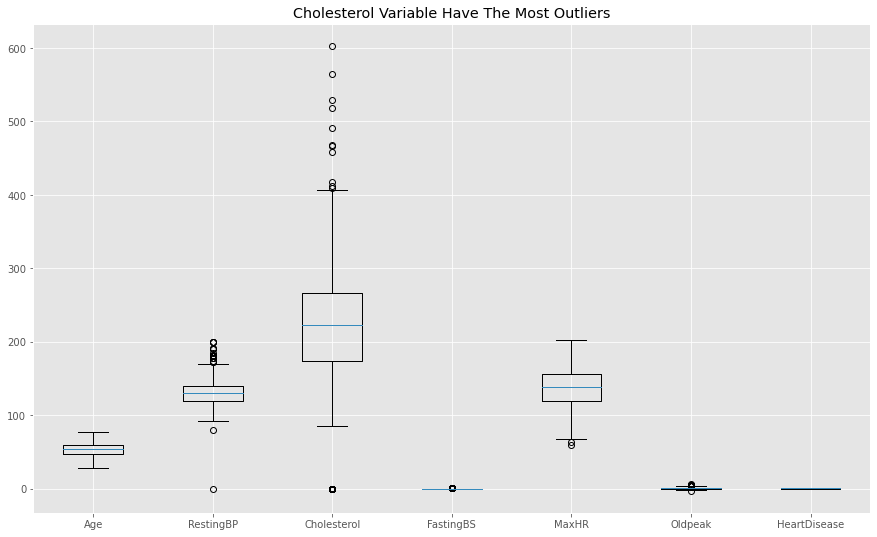

In [8]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,9))
ax.boxplot([heart_df['Age'], heart_df['RestingBP'], heart_df['Cholesterol'], heart_df['FastingBS'], heart_df['MaxHR'], heart_df['Oldpeak'], heart_df['HeartDisease']])
ax.set_xticklabels(['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease'])
ax.set_title("Cholesterol Variable Have The Most Outliers")
plt.show()

All outliers are in open circles which mean they are the mild outliers, not the extreme ones. These outliers can cause bias in the analysis. However, sometimes, they can carry valueable information instead especially the ones in the Cholesterol feature.

According to Cleveland Clinic, a normal level of cholesterol is below 150 mg/dL; if our cholesterol level is approaching 200 mg/dL, that is borderline high; and anything over 200 mg/dL is high and leaves you at greater risk for cardiovascular disease. A triglyceride level of 500 mg/dL or higher is considered dangerously high. Thus, there is nothing wrong with the data points in Cholesterol feature. They are unusual, but they are a normal part of the data distribution.

Similarly with the outliers in the other features, they are unusual, but they are a normal part of the data distribution.

# Exploratory data analysis (EDA)

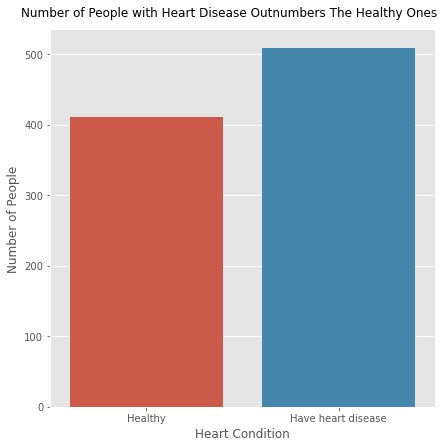

In [9]:
var_1 = sns.catplot(x='HeartDisease', kind='count', data=heart_df, height=6)
var_1.set_axis_labels(x_var='Heart Condition', y_var='Number of People')
var_1.set_xticklabels(labels=['Healthy','Have heart disease'])
var_1.fig.suptitle('Number of People with Heart Disease Outnumbers The Healthy Ones', y=1.03)
plt.show()

Why the number of people with heart disease outnumbers the healthy ones? Is it because of high level of serum cholesterol?

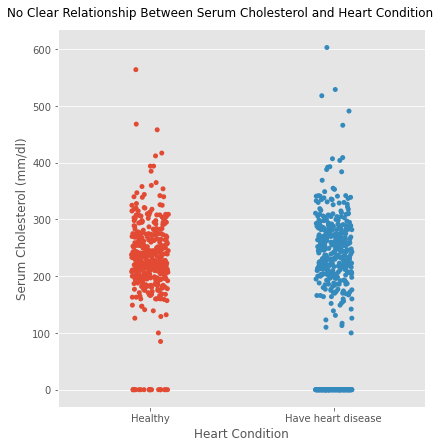

In [10]:
var_2 = sns.catplot(x='HeartDisease', y='Cholesterol', data=heart_df, height=6)
var_2.set_axis_labels(x_var='Heart Condition', y_var='Serum Cholesterol (mm/dl)')
var_2.set_xticklabels(labels=['Healthy','Have heart disease'])
var_2.fig.suptitle('No Clear Relationship Between Serum Cholesterol and Heart Condition', y=1.03)
plt.show()

Lets see the density distribution of the data in the HeartDisease feature.

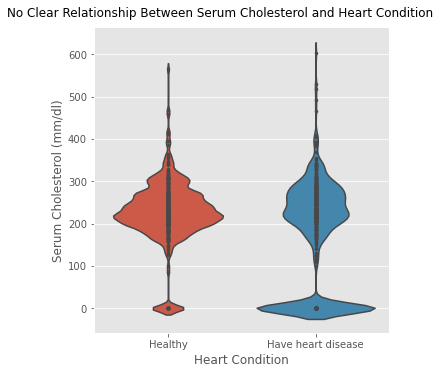

In [11]:
var_3 = sns.catplot(x='HeartDisease', y='Cholesterol', data=heart_df, kind='violin', split=True, bw=0.1, inner='points')
var_3.set_axis_labels(x_var='Heart Condition', y_var='Serum Cholesterol (mm/dl)')
var_3.set_xticklabels(labels=['Healthy','Have heart disease'])
var_3.fig.suptitle('No Clear Relationship Between Serum Cholesterol and Heart Condition', y=1.03)
plt.show()

It can be seen that most of the people with healthy heart have a serum cholesterol level ranging from 200 mm/dl to 250 mm/dl. But, that's just it. There is no further relationship heart condition and serum cholesterol. 

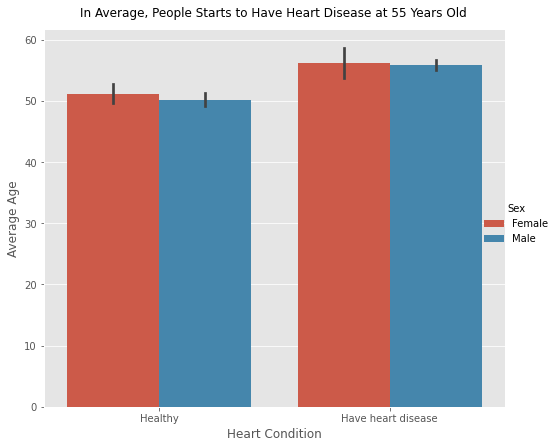

In [12]:
var_4 = sns.catplot(x='HeartDisease', y='Age', hue='Sex', data=heart_df, kind='bar', height=6, aspect=1.2)
var_4.set_axis_labels(x_var='Heart Condition', y_var='Average Age')
var_4.set_xticklabels(labels=['Healthy','Have heart disease'])
var_4.fig.suptitle('In Average, People Starts to Have Heart Disease at 55 Years Old', y=1.03)
var_4._legend.texts[0].set_text('Female')
var_4._legend.texts[1].set_text('Male')
plt.show()

In average, people starts to have heart disease at 55 years old regardless of gender.

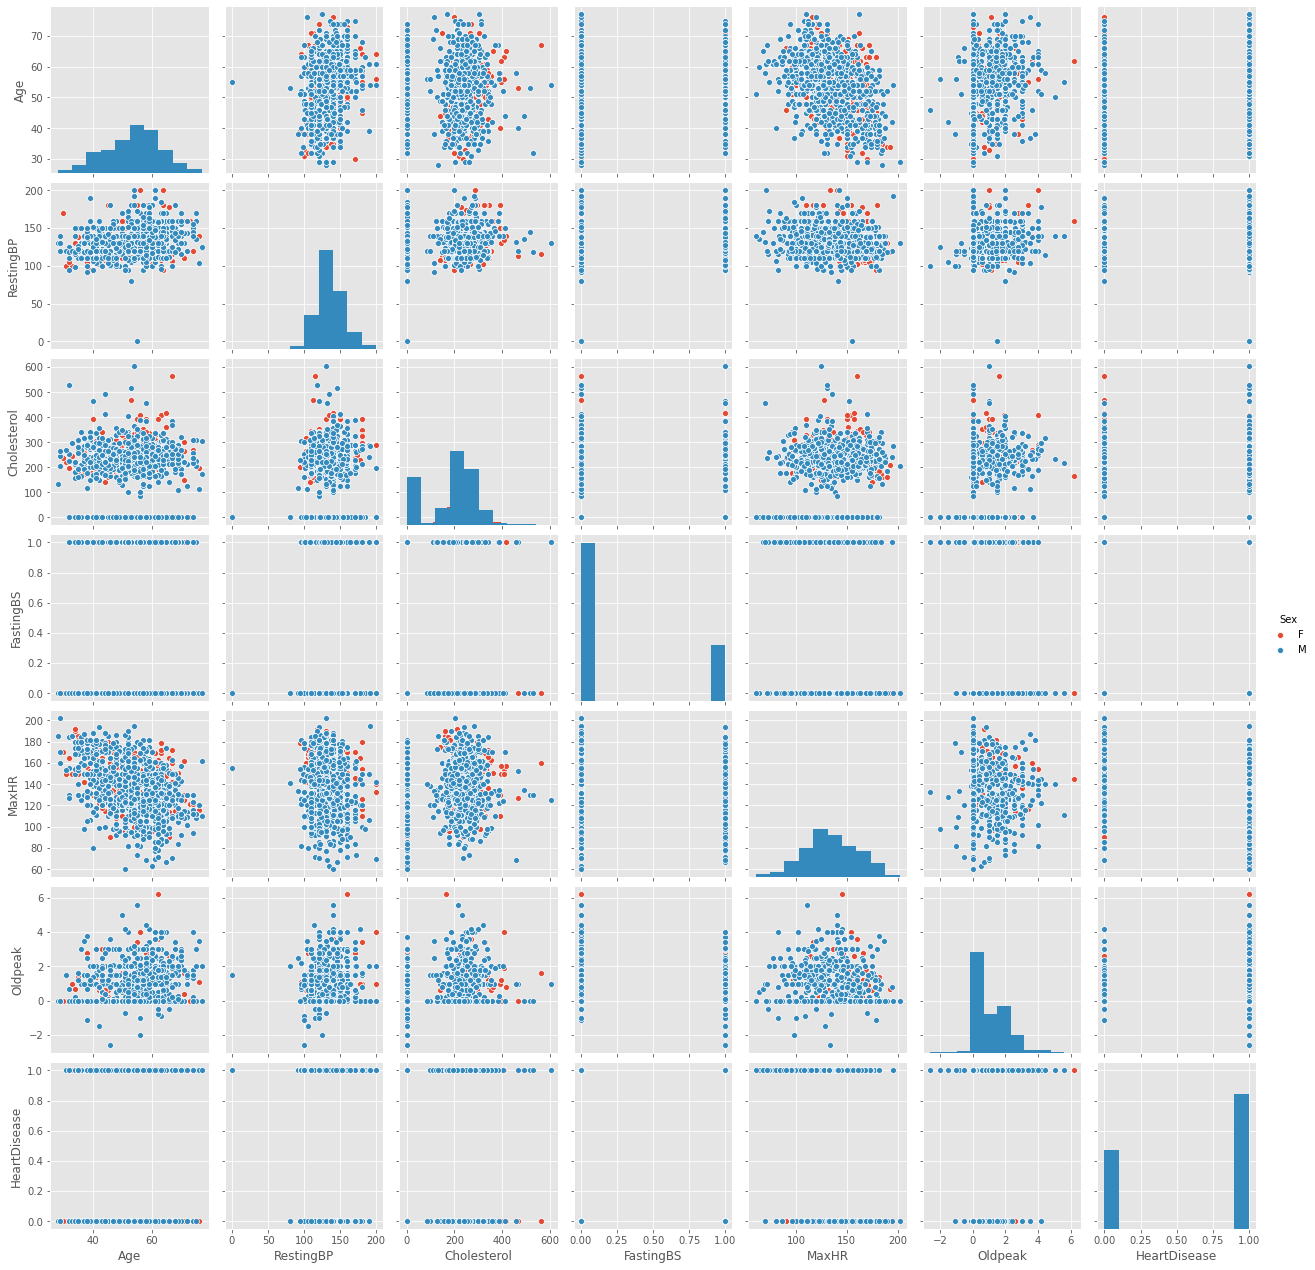

In [13]:
sns.pairplot(heart_df, hue='Sex', diag_kind='hist')
plt.show()

There is still no correlation can be clearly seen between each feature.

### Dimensionality reduction

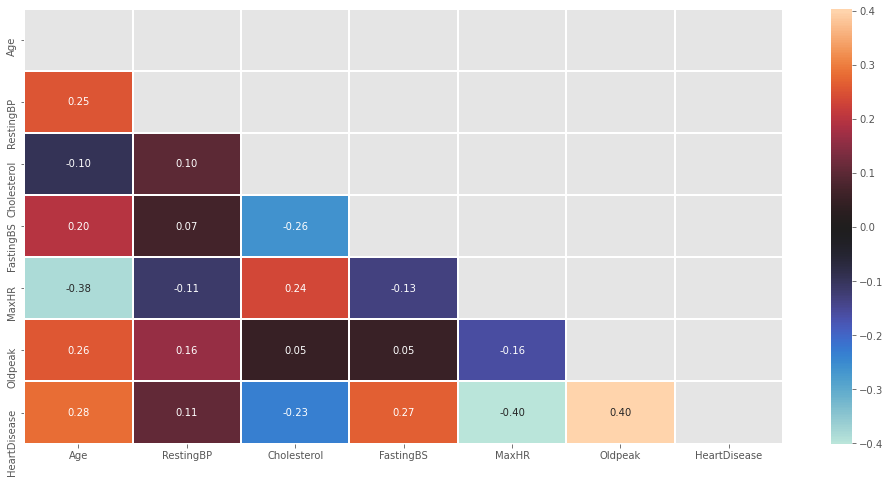

In [14]:
corr = heart_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
fig, ax = plt.subplots(figsize=(17,8))
sns.heatmap(heart_df.corr(), mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

There is no feature that is highly correlated with the other feature. Of course, these correlation values are measured before the features are scaled. The correlation values would be different by then. 

### Dealing with categorical features

In [15]:
heart_df_dummies = pd.get_dummies(heart_df)
pd.set_option('display.max_columns', None)
display(heart_df_dummies.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [16]:
print(heart_df_dummies.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease       Sex_F       Sex_M  ChestPainType_ASY  \
count  918.000000    918.000000  918.000000  918.000000         918.000000   
mean     0.887364      0.553377    0.210240    0.789760           0.540305   
std      1.066570      0.497414    0.407701    0.407701           0.498645   
min     -2.600000      0.000000    0.000000    0.000000  

In [17]:
print(heart_df_dummies.dtypes)

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_F                  uint8
Sex_M                  uint8
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_LVH         uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_N       uint8
ExerciseAngina_Y       uint8
ST_Slope_Down          uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object


### Scaling data

Different features are on different scales. Therefore, there comes a need to scale continuous features.  

In [18]:
print(heart_df_dummies.var())

Age                     88.974254
RestingBP              342.773903
Cholesterol          11964.891079
FastingBS                0.178968
MaxHR                  648.228614
Oldpeak                  1.137572
HeartDisease             0.247420
Sex_F                    0.166220
Sex_M                    0.166220
ChestPainType_ASY        0.248646
ChestPainType_ATA        0.153105
ChestPainType_NAP        0.172421
ChestPainType_TA         0.047650
RestingECG_LVH           0.163030
RestingECG_Normal        0.239998
RestingECG_ST            0.156473
ExerciseAngina_N         0.241073
ExerciseAngina_Y         0.241073
ST_Slope_Down            0.063987
ST_Slope_Flat            0.250271
ST_Slope_Up              0.245407
dtype: float64


We have numbers that are relatively close within the columns, but not across columns. Since the dataset contains several outliers that are considered undroppable, RobustScaler will be used since it is robust to the outliers.  

In [62]:
X_dummies = heart_df_dummies.drop('HeartDisease', axis=1)
y = heart_df_dummies['HeartDisease']

scaler = RobustScaler()
X = scaler.fit_transform(X_dummies)
print(X.var())

0.402038774011723


Every feature has been scaled accordingly.

# Classification

### k-Nearest Neighbors

By default, number of neighbors (n_neighbors) is 5.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=1111)
knn = KNeighborsClassifier()
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


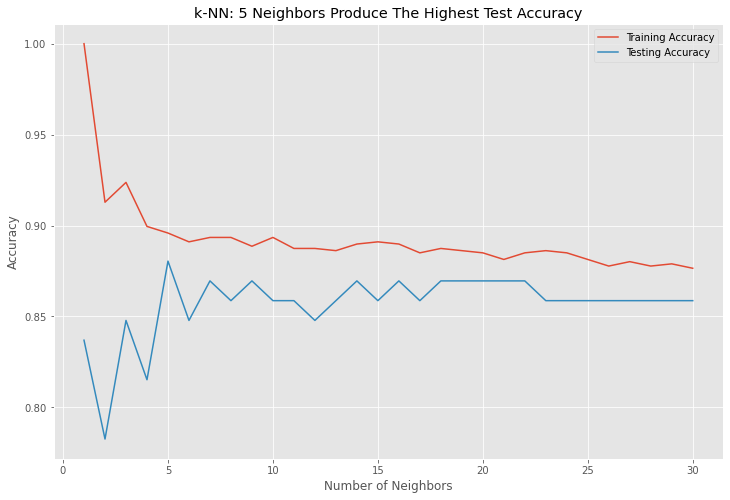

In [64]:
neighbors = np.arange(1, 31, 1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, j in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

fig, ax = plt.subplots(figsize=(12,8))
plt.title("k-NN: 5 Neighbors Produce The Highest Test Accuracy")
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

It looks like the test accuracy is highest when using 5 neighbors. Using less than 5 neighbors seems to result in a model that overfit the data.

### Logistic regression

In [65]:
logreg = LogisticRegression(random_state=1111)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Lets visually evaluate our model by looking at the Receiver Operating Characteristics (ROC) curve. For binary classification problem, the area under the ROC curve is the most versatile and common evaluation metric used to judge the quality of a binary classification model. 

It is simply the probability that a randomly chosen positive data point will have a higher rank than a randomly chosen negative data point for the learning problem. A .predict_proba() method will return the probability of a given sample being in a particular class. So, a higher area under the curve (AUC) means a more sensitive, better performing model.

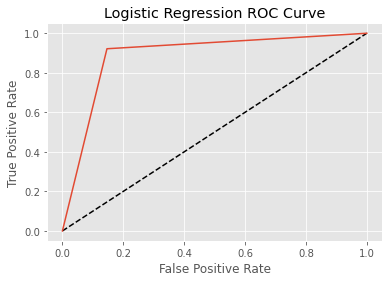

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

The AUC is greater than 0.5, the model is better than random guessing. Always a good sign!

In [67]:
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1111, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [99]:
c_space = [100,10,1,0.1,0.01]
param_grid = {'C':c_space}

logreg = LogisticRegression(random_state=1111)
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned logistic regression hyperparameter: {}".format(logreg_cv.best_params_))

Tuned logistic regression hyperparameter: {'C': 0.1}


In [100]:
y_pred_logreg_cv = logreg_cv.predict(X_test)

### Decision Tree Classifier

In [70]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dummies, y, stratify=y, test_size=0.1, random_state=1111)

dt = DecisionTreeClassifier(random_state=1111)
pprint(dt.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1111,
 'splitter': 'best'}


In [71]:
max_depth = [int(x) for x in range(1, 20)]
min_samples_leaf = [int(x) for x in np.linspace(1,30,20)]
criteria = ['gini','entropy']
max_features = [int(x) for x in range(1,15)]

param_dist = {'max_depth':max_depth, 'max_features':max_features, 'min_samples_leaf':min_samples_leaf, 'criterion':criteria}

tree_rcv = RandomizedSearchCV(dt, param_dist, cv=5, n_jobs=-1)
tree_rcv.fit(X_train_dt, y_train_dt)

print("Best randomly-tuned decision tree hyperparameters: {}".format(tree_rcv.best_params_))

Best randomly-tuned decision tree hyperparameters: {'min_samples_leaf': 17, 'max_features': 14, 'max_depth': 3, 'criterion': 'entropy'}


Now, lets find the best decision tree hyperparameters around those best randomly-picked hyperparameters.  

In [80]:
max_depth_grid = [1,2,3,4,5,6,7]
min_samples_leaf_grid = [13,14,15,16,17,18,19,20,21]
max_features_grid = [11,12,13,14,15,16,17]

param_dist_grid = {'max_depth':max_depth_grid, 'max_features':max_features_grid, 'min_samples_leaf':min_samples_leaf_grid, \
                   'criterion':['entropy']}

tree_gcv = GridSearchCV(dt, param_dist_grid, cv=5, n_jobs=-1)
tree_gcv.fit(X_train_dt, y_train_dt)

print("Best tuned decision tree hyperparameters: {}".format(tree_gcv.best_params_))

Best tuned decision tree hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 15}


### Random Forest Classifier

In [73]:
rfc = RandomForestClassifier(random_state=1111)
pprint(rfc.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}


In [74]:
n_estimators_rf = [int(x) for x in range(1, 500)]
max_depth_rf = [int(x) for x in range(1,20)]
min_samples_leaf_rf = [int(x) for x in np.linspace(1,30,20)]
max_features_rf = ['auto','log2','sqrt']

param_dist_rf = {'max_depth':max_depth_rf, 'max_features':max_features_rf, 'min_samples_leaf':min_samples_leaf_rf, \
                 'n_estimators':n_estimators_rf}

rfc_rcv = RandomizedSearchCV(rfc, param_dist_rf, cv=5, n_jobs=-1)
rfc_rcv.fit(X_train_dt, y_train_dt)

print("Best randomly-tuned random forest hyperparameters: {}".format(rfc_rcv.best_params_))

Best randomly-tuned random forest hyperparameters: {'n_estimators': 29, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 18}


In [75]:
n_estimators_rf_gcv = [25,26,27,28,29,30,31,32,33]
max_depth_rf_gcv = [16,17,18,19,20]
min_samples_leaf_rf_gcv = [2,3,4,5,6]
max_features_rf_gcv = ['log2']
                       
param_dist_rf_gcv = {'max_depth':max_depth_rf_gcv, 'max_features':max_features_rf_gcv, \
                     'min_samples_leaf':min_samples_leaf_rf_gcv, 'n_estimators':n_estimators_rf_gcv}

rfc_rcv_gcv = GridSearchCV(rfc, param_dist_rf_gcv, cv=5, n_jobs=-1)
rfc_rcv_gcv.fit(X_train_dt, y_train_dt)

print("Best tuned random forest hyperparameters: {}".format(rfc_rcv_gcv.best_params_))                

Best tuned random forest hyperparameters: {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 29}


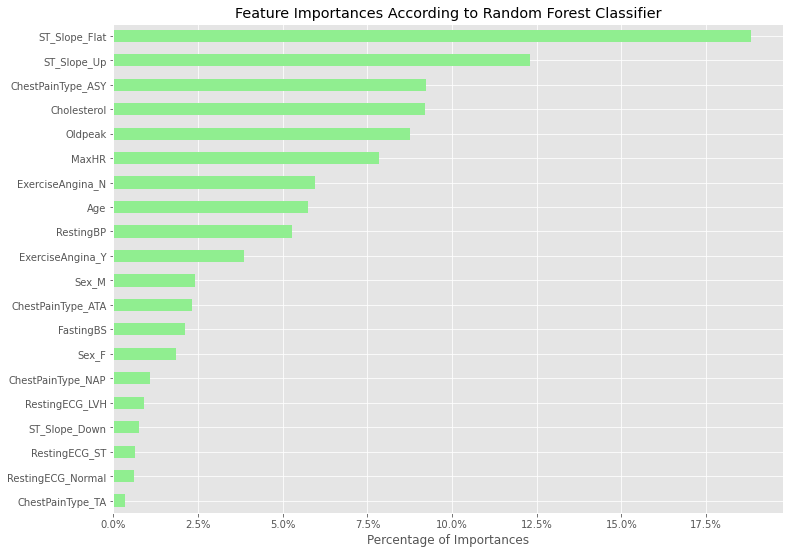

In [91]:
rf = RandomForestClassifier(random_state=1111, max_depth=16, max_features='log2', min_samples_leaf=2, n_estimators=29)
rf.fit(X_train_dt, y_train_dt)
importances = pd.Series(data=rf.feature_importances_, index=X_train_dt.columns)
importances_sorted = importances.sort_values()

fig, ax = plt.subplots(figsize=(12,9))
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importances According to Random Forest Classifier')
ax.set_xticklabels(['0.0%','2.5%','5.0%','7.5%','10.0%','12.5%','15.0%','17.5%'])
plt.xlabel('Percentage of Importances')
plt.show()

Apparently, ST_Slope_Flat and ST_Slope_Up are the most important features according to the random forest classification model. The importances of these features add up to more than 30.0%.

### Voting Classifier

In [101]:
knn_voting = KNeighborsClassifier(n_neighbors=5)
logreg_voting = LogisticRegression(random_state=1111, C=0.1)
dt_voting = DecisionTreeClassifier(random_state=1111, criterion='entropy', max_depth=5, max_features=15, \
                                   min_samples_leaf=15)
rf_voting = RandomForestClassifier(random_state=1111, max_depth=16, max_features='log2', min_samples_leaf=2, \
                                   n_estimators=29)

classifiers = [('k-Nearest Neighbors',knn_voting), ('Logistic Regression',logreg_voting), \
               ('Classification Tree',dt_voting), ('Random Forest Classification',rf_voting)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test set accuracy score of {:s}: {:.2f}%'.format(clf_name, accuracy*100))

Test set accuracy score of k-Nearest Neighbors: 88.04%
Test set accuracy score of Logistic Regression: 89.13%
Test set accuracy score of Classification Tree: 81.52%
Test set accuracy score of Random Forest Classification: 85.87%


In [102]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
accuracy_vc = accuracy_score(y_test, y_pred_vc)
print('Test set accuracy score of Voting Classifier: {:.2f}%'.format(accuracy_vc*100))

Test set accuracy score of Voting Classifier: 88.04%


Logistic regression model performs better in the accuracy score of predicting the target labels compared to the other models. Now, lets use it in the bagging model (Boostrap aggregation). 

### Bagging (Bootstrap Aggregation)

In [103]:
bc = BaggingClassifier(base_estimator=logreg_voting, n_estimators=100, oob_score=True, random_state=1111)
bc.fit(X_train, y_train)
y_pred_bc = bc.predict(X_test)
accuracy_bc = accuracy_score(y_test, y_pred_bc)
accuracy_oob = bc.oob_score_
print('Test set accuracy score of Bagging Classifier: {:.2f}%'.format(accuracy_bc*100))
print('OOB accuracy: {:.2f}%'.format(accuracy_oob*100))

Test set accuracy score of Bagging Classifier: 89.13%
OOB accuracy: 86.44%


The test set accuracy score for both logistic regression and bagging classifier models are the same, achieving the highest value of 89.13%.

### AdaBoostClassifier

In [56]:
adb_clf = AdaBoostClassifier(base_estimator=logreg_voting, n_estimators=100, random_state=1111)
adb_clf.fit(X_train, y_train)
y_pred_adb = adb_clf.predict(X_test)
accuracy_adb = accuracy_score(y_test, y_pred_adb)
print('Test set accuracy score of AdaBoostClassifier: {:.2f}%'.format(accuracy_adb*100))

Test set accuracy score of AdaBoostClassifier: 89.13%


### GradientBoostingClassifier

In [59]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1111)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)
accuracy_gbt = accuracy_score(y_test, y_pred_gbt)
print('Test set accuracy score of AdaBoostClassifier: {:.2f}%'.format(accuracy_gbt*100))

Test set accuracy score of AdaBoostClassifier: 84.78%


# The Chosen Model

### Logistic Regression Model

It can be concluded that the logistic regression model generates the highest-scoring test set accuracy.

In [108]:
logreg_chosen = LogisticRegression(random_state=1111, C=0.1)
%timeit logreg_chosen.fit(X_train, y_train)
y_pred_logreg_chosen = logreg_chosen.predict(X_test)

10.5 ms ± 484 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It takes about 10 ms to fit the model to the training set.

In [110]:
print('Training set accuracy score: {:.2f}%'.format(logreg_chosen.score(X_train, y_train) * 100))
print('Hold-out set accuracy score: {:.2f}%'.format(logreg_chosen.score(X_test, y_test) * 100))
print('Accuracy score: {:.2f}%'.format(accuracy_score(y_test, y_pred_logreg_chosen) * 100))
print('ROC AUC score: {:.2f}%'.format(roc_auc_score(y_test, y_pred_logreg_chosen) * 100))

Training set accuracy score: 86.80%
Hold-out set accuracy score: 89.13%
Accuracy score: 89.13%
ROC AUC score: 88.76%


In [112]:
print("Confusion matrix:\n\n{}".format(confusion_matrix(y_test, y_pred_logreg_chosen)))

Confusion matrix:

[[35  6]
 [ 4 47]]


There are 82 out of 92 data have been correctly predicted by the model where the remaining 6 and 4 data are false-negative and false-positive results respectively.

In [113]:
print("Classification report:\n\n{}".format(classification_report(y_test, y_pred_logreg_chosen)))

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.89      0.92      0.90        51

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92

